In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer_Churn.csv')
df #calling dataframe



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


Replacing the blanks in TotalCharges with 0

In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0");
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check NULL values from Columns



In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df = df.duplicated().sum()

In [17]:
# Check duplicates based on unique in data
df["customerID"].duplicated().sum()

np.int64(0)

In [35]:
# Convert 0 1 value to No-Yes in senior citizen

def conv(value):
    if value == 0:
        return "No"
    else:
        return "Yes"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


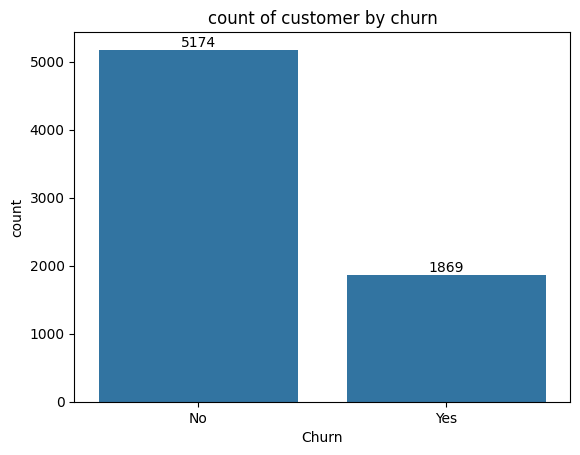

In [16]:
# why customer churn out 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot( x = "Churn" , data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

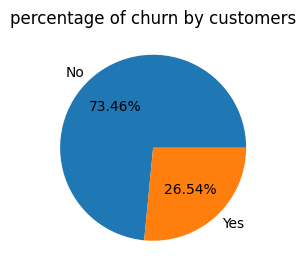

In [25]:
gb = df.groupby("Churn").agg({'Churn' : "count"})
gb

plt.figure(figsize = (3,4))
plt.pie(gb["Churn"],labels = gb.index ,autopct = "%1.2f%%")
plt.title("percentage of churn by customers")

plt.show()


# from the given pie chart we conclude that 26.5% of cutomer have churned out


In [33]:
gb = df.groupby("gender").agg({"Churn" : "count"})
gb

# print("\n")
# plt.figure(figsize = (3,4))
# plt.pie(gb["Churn"],labels = gb.index ,autopct = "%1.2f%%")
# plt.title("percentage of churn by gender")

# plt.show()

,Churn
gender,
Female,3488
Male,3555


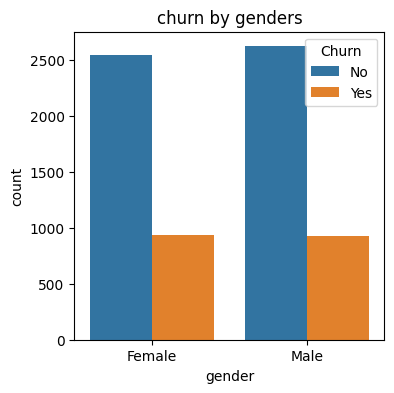

In [32]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender" ,data = df ,hue = "Churn")
plt.title("churn by genders")
plt.show()

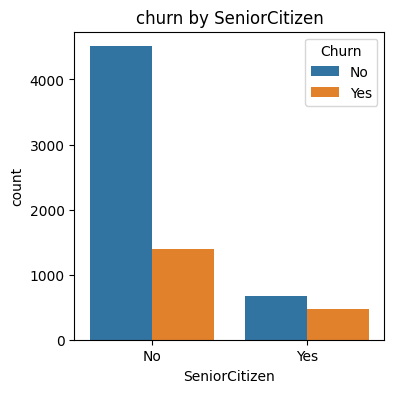

In [36]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen" ,data = df ,hue = "Churn")
plt.title("churn by SeniorCitizen")
plt.show()


Churn rate in senior citizen is more 

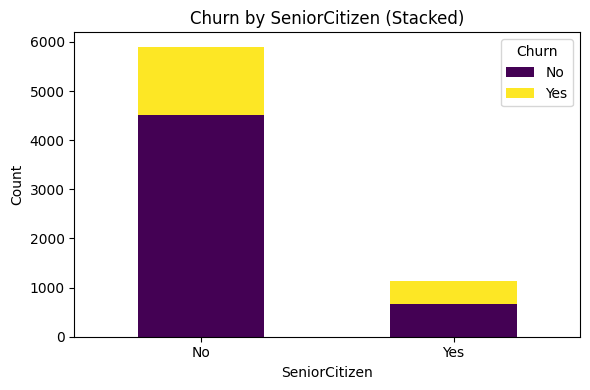

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data to count occurrences of SeniorCitizen and Churn
stacked_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

# Customize the chart
plt.title('Churn by SeniorCitizen (Stacked)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# Show the plot
plt.show()


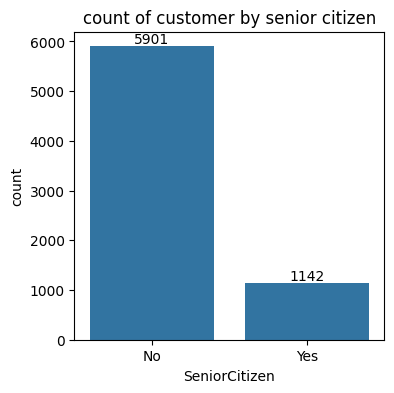

In [40]:
plt.figure(figsize = (4,4))
ax =sns.countplot(x = "SeniorCitizen" ,data = df )
ax.bar_label(ax.containers[0])
plt.title("count of customer by senior citizen")
plt.show()


<Axes: xlabel='tenure', ylabel='Count'>

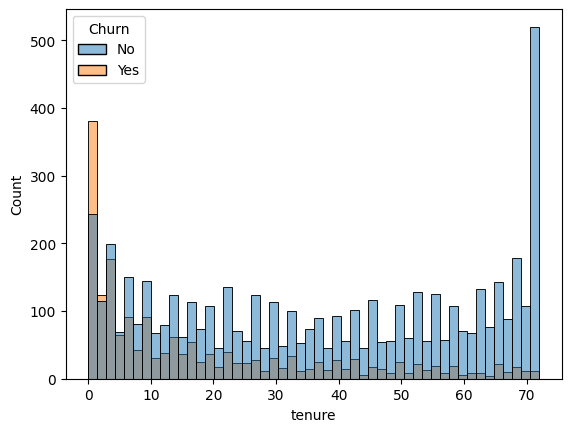

In [44]:
sns.histplot(x = "tenure" , data = df ,bins=50 ,hue = "Churn")

people who have use our service for a long time have stayed 

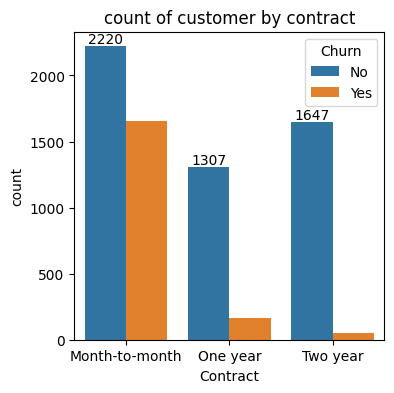

In [47]:
plt.figure(figsize = (4,4))
ax =sns.countplot(x = "Contract" ,data = df ,hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("count of customer by contract")
plt.show()

In [52]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

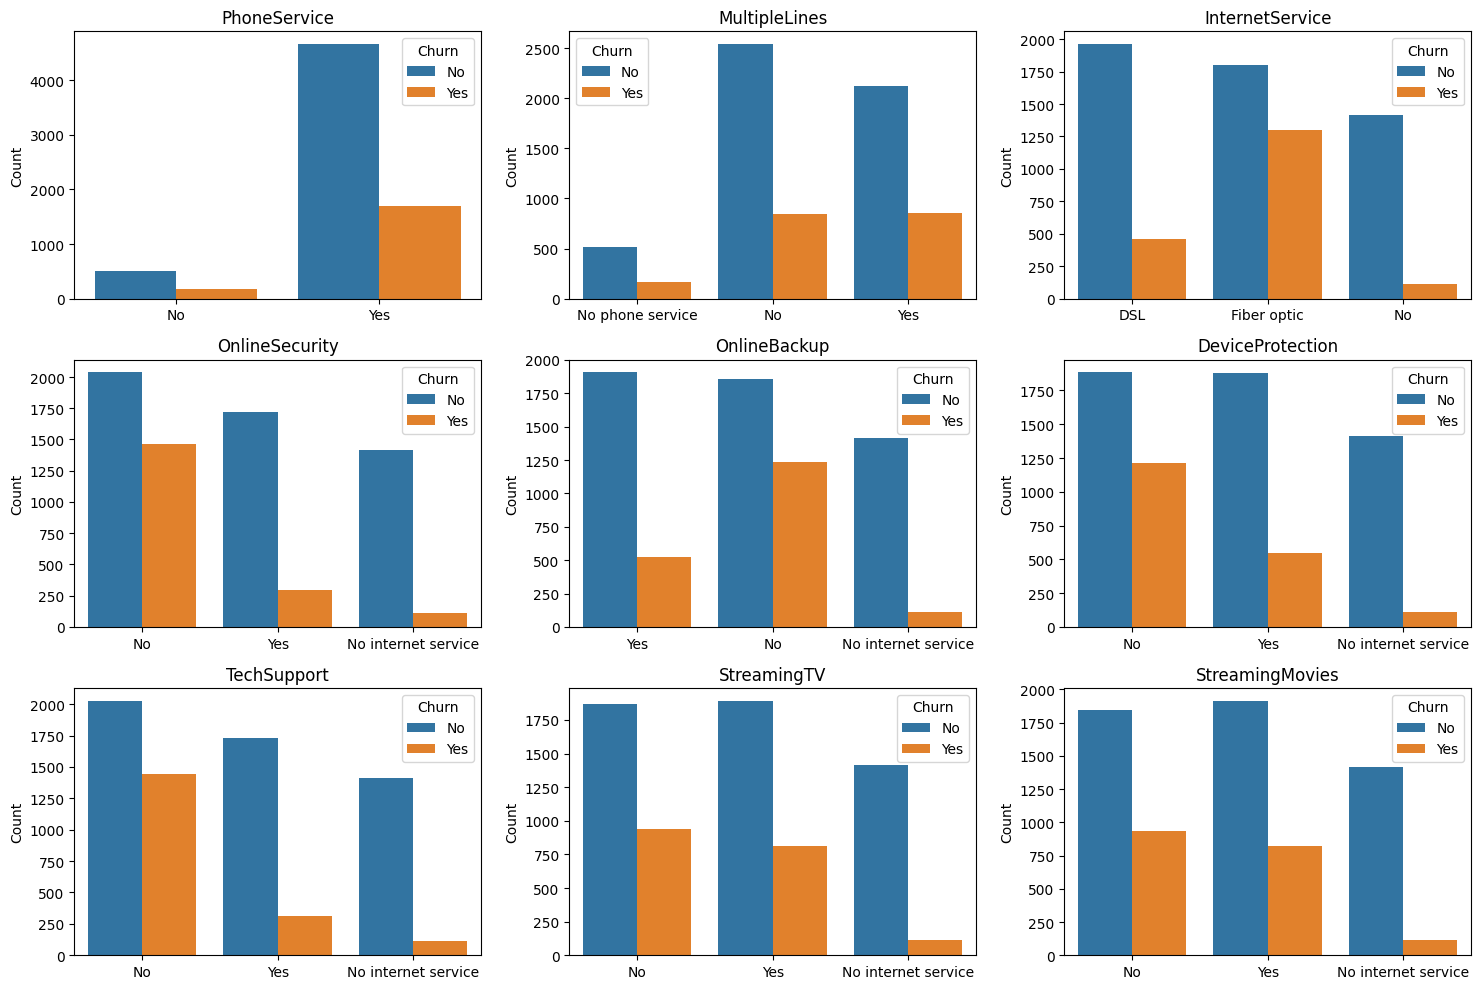

In [54]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate rows required
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i] , hue = "Churn")
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The chart illustrates customer service usage across categories such as PhoneService, InternetService, and StreamingTV, segmented by churn status (Yes/No). Customers with no additional services (e.g., OnlineSecurity, TechSupport) have higher churn rates, particularly for Fiber optic internet users. Conversely, bundled services like OnlineBackup and DeviceProtection see lower churn rates overall. This suggests that offering more service options could reduce churn.

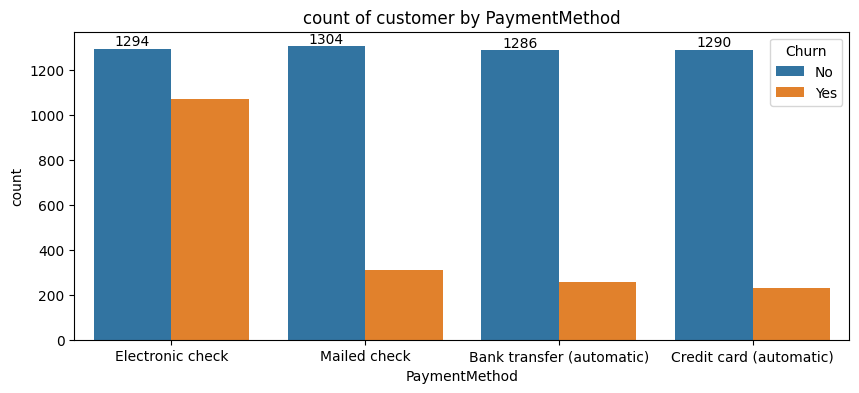

In [58]:
plt.figure(figsize = (10,4))
ax =sns.countplot(x = "PaymentMethod" ,data = df ,hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("count of customer by PaymentMethod")
plt.show()

customer is likely to churn when he using electronic check as payment method